In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

In [2]:
df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [4]:
df.dropna(inplace=True, axis=1)

In [5]:
# Encode the column calling the encoding function created in utils.py file

from util import encode_categorical_columns

# List of columns to encode
columns_to_encode = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                     'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                     'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Call the function to encode categorical columns
df_en = encode_categorical_columns(df, columns_to_encode)

In [6]:
# Replace 'Yes' with 1 and 'No' with 0 in the 'Churn' column
df_en['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [7]:
# Separate features and target
X = df_en.drop(columns=['customerID', 'Churn'])
y = df_en['Churn']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5634, 39)
X_test shape: (1409, 39)
y_train shape: (5634,)
y_test shape: (1409,)


In [9]:
# Standadize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [10]:
# create a deep learning model using keras
tf.random.set_seed(42)

model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10


2023-10-07 15:19:58.793547: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


141/141 [==============================] - 2s 10ms/step - loss: 0.4879 - accuracy: 0.7673 - val_loss: 0.4286 - val_accuracy: 0.8030
Epoch 2/10
141/141 [==============================] - 1s 8ms/step - loss: 0.4341 - accuracy: 0.7879 - val_loss: 0.4118 - val_accuracy: 0.8057
Epoch 3/10
141/141 [==============================] - 1s 8ms/step - loss: 0.4382 - accuracy: 0.7870 - val_loss: 0.4132 - val_accuracy: 0.8030
Epoch 4/10
141/141 [==============================] - 1s 8ms/step - loss: 0.4361 - accuracy: 0.7868 - val_loss: 0.4276 - val_accuracy: 0.8110
Epoch 5/10
141/141 [==============================] - 1s 8ms/step - loss: 0.4348 - accuracy: 0.7868 - val_loss: 0.4220 - val_accuracy: 0.7977
Epoch 6/10
141/141 [==============================] - 1s 8ms/step - loss: 0.4364 - accuracy: 0.7921 - val_loss: 0.4114 - val_accuracy: 0.8075
Epoch 7/10
141/141 [==============================] - 1s 8ms/step - loss: 0.4353 - accuracy: 0.7899 - val_loss: 0.4193 - val_accuracy: 0.7977
Epoch 8/10
141/1

In [13]:
# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

45/45 [==============================] - 0s 2ms/step


In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Deep Learning Model Accuracy:", accuracy)

Deep Learning Model Accuracy: 0.7352732434350603


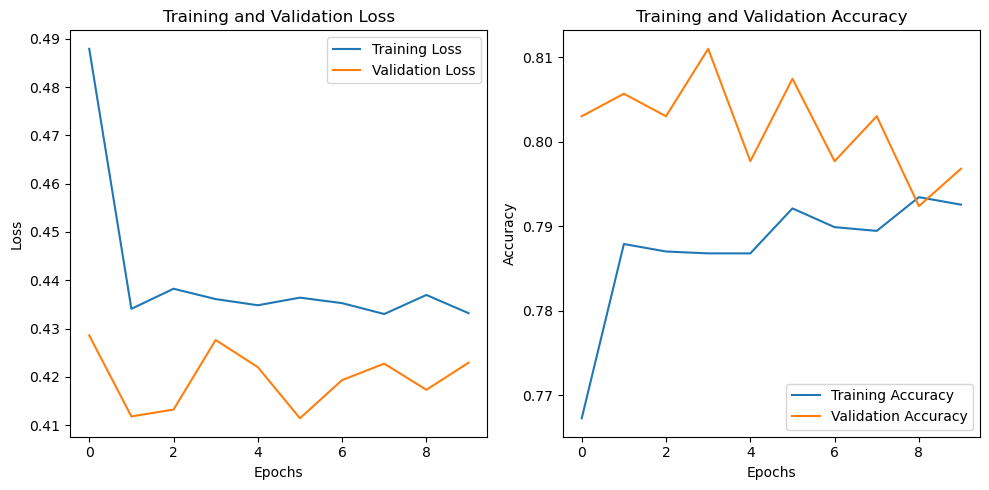

In [15]:
import matplotlib.pyplot as plt

# Access training history
history_dict = history.history

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()


In [16]:
class_distribution = df_en['Churn'].value_counts(normalize=True)
print(class_distribution)


0    0.73463
1    0.26537
Name: Churn, dtype: float64


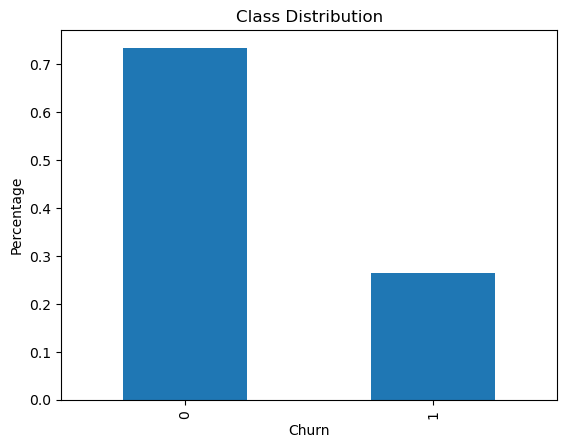

In [17]:
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.show()